### 必要なライブラリのインポート

In [34]:
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm
from time import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import random


import pyconll
import pyconll.tree
from scripts.TreeKernel import tree, tree_kernels
from scripts import create_strings

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline


In [3]:



def to_prolog_unlabel(tree: pyconll.tree.tree.Tree) -> str:
    if tree._children:
        children_repr = ', '.join(to_prolog_unlabel(child) for child in tree._children)
        return f'_({children_repr})'
    else:
        return f'_'

"""
def calc_kernel_matrix(data1, data2, kernel: tree_kernels.KernelST):
    n1, n2 = len(data1), len(data2)
    matrix = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            matrix[i][j] = kernel.kernel(data1[i], data2[j])
    return matrix
"""


def to_prolog_upos(tree: pyconll.tree.tree.Tree) -> str:
    if tree._children:
        children_repr = ', '.join(to_prolog_upos(child) for child in tree._children)
        return f'{tree.data.upos}({children_repr})'
    else:
        return f'{tree.data.upos}'


In [9]:
random_state = 50

In [10]:
root1 = tree.TreeNode("1", [
    tree.TreeNode("2", [
        tree.TreeNode("4", [
            tree.TreeNode("8"),
            tree.TreeNode("9")
        ]),
        tree.TreeNode("5")
    ]),
    tree.TreeNode("3", [
        tree.TreeNode("6"),
        tree.TreeNode("7")
    ])
])

root2 = tree.TreeNode("F", [
    tree.TreeNode("G"),
    tree.TreeNode("H", [
        tree.TreeNode("I")
    ])
])

tree1 = tree.Tree(root1)
tree2 = tree.Tree(root2)

print(tree1, tree2, sep="\n")

1(2(4(8,9),5),3(6,7))
F(G,H(I))


In [11]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def create_complete_tree(n):
    if n <= 0:
        return None  # ノード数が0以下なら空の木を返す
    
    # ノードをリストで作成
    nodes = [TreeNode(i) for i in range(1, n + 1)]
    
    # 親と子を接続
    for i in range(n):
        left_index = 2 * i + 1  # 左の子のインデックス
        right_index = 2 * i + 2  # 右の子のインデックス
        
        if left_index < n:  # 左の子が存在する場合
            nodes[i].left = nodes[left_index]
        if right_index < n:  # 右の子が存在する場合
            nodes[i].right = nodes[right_index]
    
    return nodes[0]  # ルートノードを返す

# 指定形式でツリーを表現
def tree_to_custom_format(node):
    if node is None:
        return ""
    
    left = tree_to_custom_format(node.left)
    right = tree_to_custom_format(node.right)
    
    if left or right:  # 子がいる場合
        return f"{node.value}({left},{right})".strip(',')
    else:  # 葉ノードの場合
        return f"{node.value}"

# 使用例
n = 7
root = create_complete_tree(n)
custom_format_tree = tree_to_custom_format(root)
print(custom_format_tree)
root_tk = tree.TreeNode.fromPrologString(custom_format_tree)
print(root_tk)
tree_tk = tree.Tree(root_tk)
print(tree_tk)

1(2(4,5),3(6,7))
1(2(4,5),3(6,7))
1(2(4,5),3(6,7))


In [12]:
lambda_value = 0.5
kernelST = tree_kernels.KernelST(lambda_value)

In [13]:
from scripts import create_strings

ct = create_strings.create_complete_tree_TK(4)
print(ct, type(ct))
lt_l = create_strings.create_linear_tree_TK(4, direction="left")
print(lt_l, type(lt_l))
lt_r = create_strings.create_linear_tree_TK(4, direction="right")
print(lt_r, type(lt_r))

lambda_value = 0.5
kernelST = tree_kernels.KernelST(lambda_value)

print(lt_l==lt_r)
print(kernelST.kernel(lt_l, lt_r), kernelST.kernel(lt_l,lt_l), kernelST.kernel(lt_r, lt_r))

AttributeError: module 'scripts.create_strings' has no attribute 'create_complete_tree_TK'

In [ ]:
root_tk = tree.TreeNode.fromPrologString(root)
print(root_tk)

AttributeError: 'TreeNode' object has no attribute 'rstrip'

In [ ]:
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

In [ ]:
kernel.kernel(tree1, tree1)

1.65625

In [ ]:
CoNLL = pyconll.load_from_file("corpora/English/English-EWT.conllu")
count_en = len(CoNLL)
CoNLL += pyconll.load_from_file("corpora/English/English-Atis.conllu")
count_ja = len(CoNLL) - count_en

labels = [0]*count_en + [1]*count_ja

trees = [conll.to_tree() for conll in CoNLL]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog_upos(t))
    tree_ = tree.Tree(root)
    data.append(tree_)


In [ ]:
to_prolog_upos(trees[0])

'PRON(VERB(SCONJ, PROPN, PROPN(ADP), PUNCT))'

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.20, random_state=random_state
)

    # 部分木の比較用カーネルを作成
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)


In [ ]:
train_kernel_matrix = calc_kernel_matrix(kernel)

NameError: name 'calc_kernel_matrix' is not defined

In [ ]:
train_kernel_matrix

In [ ]:
matrix_T = train_kernel_matrix.copy().transpose()

In [ ]:
matrix_T

In [ ]:
np.equal(train_kernel_matrix, matrix_T)

In [ ]:
np.array_equal(train_kernel_matrix, matrix_T)

In [ ]:
n = 5
matrix = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        matrix[i,j] = kernel.kernel(train_data[i], train_data[j])

In [ ]:
matrix

In [ ]:
matrix + matrix.T - np.diag(matrix.diagonal())

### 単一言語間の差異(English-EWT, ESL, Atis)

In [ ]:
k=1000

In [ ]:
CoNLL_EN = pyconll.load_from_file("corpora/English/English-EWT.conllu")
CoNLL_EN = random.sample(CoNLL_EN, k=k)
num_EWT = len(CoNLL_EN)

CoNLL_ESL = pyconll.load_from_file("corpora/English/English-ESL.conllu")
CoNLL_EN += random.sample(CoNLL_ESL, k=k)
num_ESL = len(CoNLL_EN) - num_EWT

CoNLL_Atis = pyconll.load_from_file("corpora/English/English-Atis.conllu")
CoNLL_EN += random.sample(CoNLL_Atis, k=k)
num_Atis = len(CoNLL_EN) - num_ESL - num_EWT


labels = [0]*num_EWT + [1]*num_ESL + [2]*num_Atis

trees = [conll.to_tree() for conll in CoNLL_EN]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog(t))
    tree_ = tree.Tree(root)
    data.append(tree_)

In [ ]:
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

In [ ]:
def calc_kernel_matrix(kernel: tree_kernels.Kernel, data1, data2=None):
    
    if data2==None:
        n = len(data1)
        matrix = np.zeros((n,n))
        for i in tqdm(range(n)):
            for j in range(i,n):
                matrix[i][j] = kernel.kernel(data1[i], data1[j])
        return matrix + matrix.T -np.diag(matrix.diagonal())

    n1, n2 = len(data1), len(data2)
    matrix = np.zeros((n1, n2))
    for i in tqdm(range(n1)):
        for j in range(n2):
            matrix[i][j] = kernel.kernel(data1[i], data2[j])
    return matrix

In [ ]:
def calc_kernel_matrix_parallel(kernel, data1, data2=None, use_threads=True):
    def compute_row(i, n, data, other_data=None):
        row = np.zeros(n)
        for j in range(n):
            if other_data is None:
                row[j] = kernel.kernel(data[i], data[j])
            else:
                row[j] = kernel.kernel(data[i], other_data[j])
        return i, row

    n1 = len(data1)
    n2 = len(data2) if data2 is not None else n1
    result = np.zeros((n1, n2))
    
    executor_cls = ThreadPoolExecutor if use_threads else ProcessPoolExecutor

    with executor_cls() as executor:
        futures = []
        for i in range(n1):
            futures.append(executor.submit(compute_row, i, n2, data1, data2))

        for future in tqdm(futures):
            i, row = future.result()
            result[i, :] = row

    if data2 is None:
        return result + result.T - np.diag(result.diagonal())
    return result

In [ ]:
kernel_mat = calc_kernel_matrix(kernel=kernel, data1=data)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
kernel_matrix_between_ENs = kernel_mat

In [ ]:
%store kernel_matrix_between_ENs

Stored 'kernel_matrix_between_ENs' (ndarray)


/home/yamazoe/.pyenv/versions/3.11.7/envs/env_pq/lib/python3.11/site-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/kernel_matrix_between_ENs requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [ ]:
np.save(f"kernel_matrix_between_En_corpora_{1000}", kernel_matrix_between_ENs)

In [ ]:
matrix = np.load("kernel_matrix_between_En_corpora.npy")

In [ ]:
print(matrix)

[[ 4.2734375  16.          7.         ...  2.25        3.5
   7.25      ]
 [16.         68.51611364 31.         ...  6.          9.
  27.        ]
 [ 7.         31.         14.56445312 ...  2.          3.
  11.5625    ]
 ...
 [ 2.25        6.          2.         ...  2.53125     3.75
   4.25      ]
 [ 3.5         9.          3.         ...  3.75        5.7578125
   6.5       ]
 [ 7.25       27.         11.5625     ...  4.25        6.5
  12.84423828]]


In [ ]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_between_ENs)

In [ ]:
axes_ticks= [-100, -50, 0, 50, 100]
axes_labels = [-100, "", 0, "", 100]

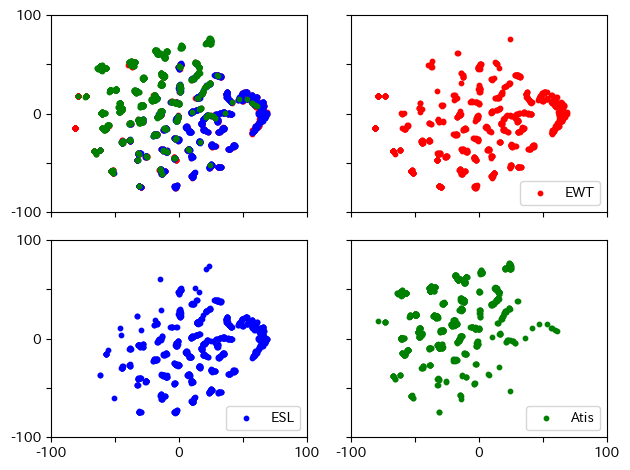

In [ ]:
fig, ax = plt.subplots(2,2, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:num_EWT,0], X_reduced[:num_EWT,1], label="EWT", alpha=1, s=10, c="r")
ax[0,0].scatter(X_reduced[num_EWT:num_EWT+num_ESL,0], X_reduced[num_EWT:num_EWT+num_ESL,1], label="ESL", alpha=1, s=10, c="b")
ax[0,0].scatter(X_reduced[num_EWT+num_ESL:,0], X_reduced[num_EWT+num_ESL:,1],label="Atis", alpha=1, s=10, c="g")

ax[0,0].set_xticks(axes_ticks)
ax[0,0].set_xticklabels(axes_labels)
ax[0,0].set_yticks(axes_ticks)
ax[0,0].set_yticklabels(axes_labels)


ax[0,1].scatter(X_reduced[:num_EWT,0], X_reduced[:num_EWT,1], label="EWT", alpha=1, s=10, c="r")

ax[0,1].set_xticks(axes_ticks)
ax[0,1].set_xticklabels(axes_labels)
ax[0,1].set_yticks(axes_ticks)
ax[0,1].set_yticklabels(axes_labels)

ax[0,1].legend(loc="lower right")

ax[1,0].scatter(X_reduced[num_EWT:num_EWT+num_ESL,0], X_reduced[num_EWT:num_EWT+num_ESL,1], label="ESL", alpha=1, s=10, c="b")


ax[1,0].set_xticks(axes_ticks)
ax[1,0].set_xticklabels(axes_labels)
ax[1,0].set_yticks(axes_ticks)
ax[1,0].set_yticklabels(axes_labels)

ax[1,0].legend(loc="lower right")

ax[1,1].scatter(X_reduced[num_EWT+num_ESL:,0], X_reduced[num_EWT+num_ESL:,1],label="Atis", alpha=1, s=10, c="g")


ax[1,1].set_xticks(axes_ticks)
ax[1,1].set_xticklabels(axes_labels)
ax[1,1].set_yticks(axes_ticks)
ax[1,1].set_yticklabels(axes_labels)

ax[1,1].legend(loc="lower right")


plt.savefig("tmp.png", dpi=600)

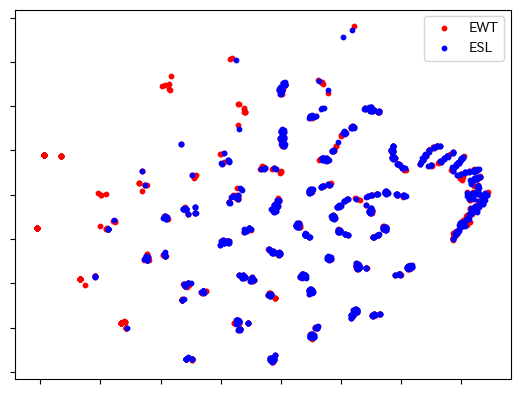

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_reduced[:num_EWT,0], X_reduced[:num_EWT,1], label="EWT", alpha=1, s=10, c="r")
ax.scatter(X_reduced[num_EWT:num_EWT+num_ESL,0], X_reduced[num_EWT:num_EWT+num_ESL,1], label="ESL", alpha=1, s=10, c="b")

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.legend()

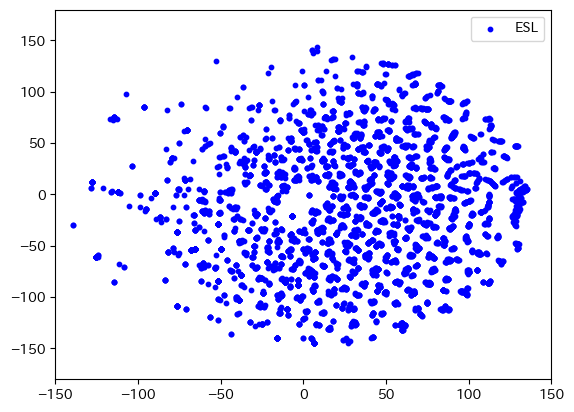

In [ ]:
fig, ax = plt.subplots()
ax[1,1].scatter(X_reduced[num_EWT:num_EWT+num_ESL,0], X_reduced[num_EWT:num_EWT+num_ESL,1], label="ESL", alpha=1, s=10, c="b")

ax[1,1].set_xlim(-150, 150)
ax[1,1].set_ylim(-180, 180)

ax[1,1].legend()

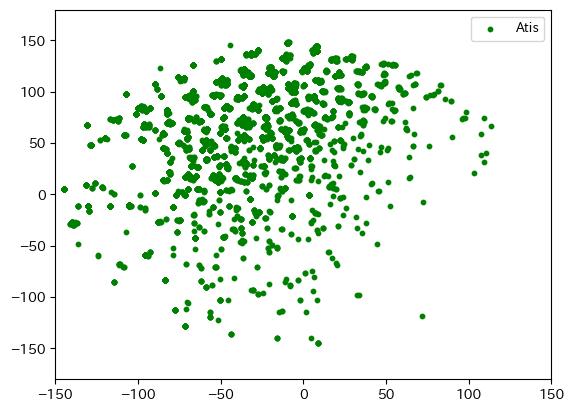

In [ ]:
fig, ax = plt.subplots()
ax[1,1].scatter(X_reduced[num_EWT+num_ESL:,0], X_reduced[num_EWT+num_ESL:,1],label="Atis", alpha=1, s=10, c="g")

ax[1,1].set_xlim(-150, 150)
ax[1,1].set_ylim(-180, 180)

ax[1,1].legend()

In [ ]:
CoNLL_EN = pyconll.load_from_file("corpora/English/English-EWT.conllu")
CoNLL_EN = random.sample(CoNLL_EN, k=k)
num_EWT = len(CoNLL_EN)

CoNLL_ESL = pyconll.load_from_file("corpora/English/English-ESL.conllu")
CoNLL_EN += random.sample(CoNLL_ESL, k=k)
num_ESL = len(CoNLL_EN) - num_EWT

CoNLL_Atis = pyconll.load_from_file("corpora/English/English-Atis.conllu")
CoNLL_EN += random.sample(CoNLL_Atis, k=k)
num_Atis = len(CoNLL_EN) - num_ESL - num_EWT


labels = [0]*num_EWT + [1]*num_ESL + [2]*num_Atis

trees = [conll.to_tree() for conll in CoNLL_EN]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog_upos(t))
    tree_ = tree.Tree(root)
    data.append(tree_)

In [ ]:
kernel_mat = calc_kernel_matrix(kernel=kernel, data1=data)

  0%|          | 0/3000 [00:00<?, ?it/s]

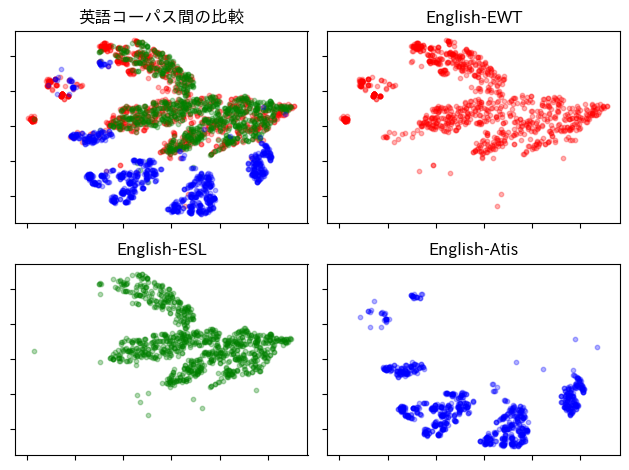

In [ ]:
k=1000
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_mat)

nums_list = [k]*5
nums_sum = [k*(i+1) for i in range(5)]

fig, ax = plt.subplots(2,2, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")

ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
ax[0,0].set_title("英語コーパス間の比較")


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].set_title("English-EWT")


ax[1,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1],label="French-GSD", alpha=0.3, s=10, c="g")
ax[1,0].set_title("English-ESL")

ax[1,1].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="Chinese-GSD", alpha=0.3, s=10, c="b")
ax[1,1].set_title("English-Atis")

plt.savefig(f"TreeKernel_En_corpora_{k}_upos.png", dpi=600)

### 複数言語間の比較

English-EWT, Japanese-BCCWJ, French-GSD, Chinese-GSD, Korean-Kaist

In [ ]:
nums_list = []

CoNLL_multi = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_En = len(CoNLL_multi)
nums_list.append(num_En)

CoNLL_multi += pyconll.load_from_file("corpora/Japanese/Japanese-BCCWJ.conllu")
num_Ja = len(CoNLL_multi) - sum(nums_list)
nums_list.append(num_En)

CoNLL_multi += pyconll.load_from_file("corpora/French/French-GSD.conllu")
num_Fr = len(CoNLL_multi) - sum(nums_list)
nums_list.append(num_Fr)

CoNLL_multi += pyconll.load_from_file("corpora/Chinese/Chinese-GSD.conllu")
num_Zh = len(CoNLL_multi) - sum(nums_list)
nums_list.append(num_Zh)

CoNLL_multi += pyconll.load_from_file("corpora/Korean/Korean-Kaist.conllu")
num_Ko = len(CoNLL_multi) - sum(nums_list)
nums_list.append(num_Ko)




labels = []
for i, nums in enumerate(nums_list):
    labels += [i]*nums


trees = [conll.to_tree() for conll in CoNLL_multi]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog(t))
    tree_ = tree.Tree(root)
    data.append(tree_)

print(len(data))

NameError: name 'to_prolog' is not defined

In [ ]:
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

In [ ]:
kernel_matrix_multi = calc_kernel_matrix(kernel=kernel, data1=data)
np.save("kernel_matrix_multi_languages", kernel_matrix_multi)

  0%|          | 0/115187 [00:00<?, ?it/s]

In [ ]:
CoNLL = pyconll.load_from_file("corpora/English/English-EWT.conllu")
count_en = len(CoNLL)

In [ ]:
trees = [conll.to_tree() for conll in CoNLL]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog(t))
    tree_ = tree.Tree(root)
    data.append(tree_)

In [ ]:
len(data)

16621

In [ ]:
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

In [ ]:
kernel_mat = calc_kernel_matrix_parallel(kernel=kernel, data1=data)

  0%|          | 0/16621 [00:00<?, ?it/s]

In [ ]:
kernel_matrix_multi = np.load("kernel_matrix_multi_languages.npy")

In [ ]:
nums_list = [10000]*5
nums_sum = [10000*(i+1) for i in range(5)]
nums_sum

[10000, 20000, 30000, 40000, 50000]

In [ ]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

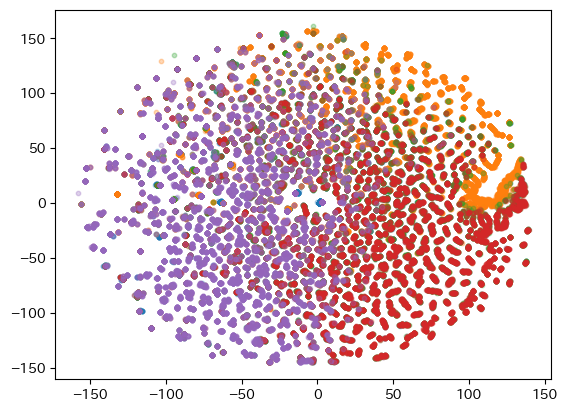

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10)
ax.scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10)
ax.scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10)
ax.scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish", alpha=0.3, s=10)
ax.scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10)

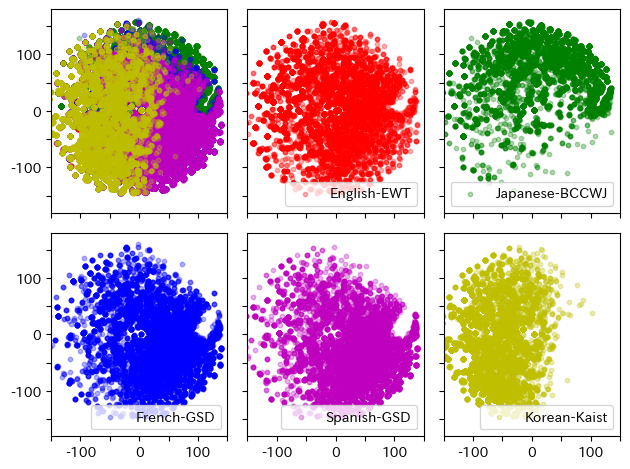

In [ ]:
fig, ax = plt.subplots(2,3, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax[0,0].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish", alpha=0.3, s=10, c="m")
ax[0,0].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")

ax[0,0].set_xlim(-150, 150)
ax[0,0].set_ylim(-180, 180)

ax[0,0].set_xticks(axes_ticks)
ax[0,0].set_xticklabels(axes_labels)
ax[0,0].set_yticks(axes_ticks)
ax[0,0].set_yticklabels(axes_labels)


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].legend(loc="lower right")

ax[0,2].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese-BCCWJ", alpha=0.3, s=10, c="g")
ax[0,2].legend(loc="lower right")

ax[1,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French-GSD", alpha=0.3, s=10, c="b")
ax[1,0].legend(loc="lower right")

ax[1,1].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish-GSD", alpha=0.3, s=10, c="m")
ax[1,1].legend(loc="lower right")

ax[1,2].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean-Kaist", alpha=0.3, s=10, c="y")
ax[1,2].legend(loc="lower right")

plt.savefig("TreeKernel_multi_language.png", dpi=600)

In [ ]:
kernel_matrix_multi = np.load("kernel_matrix_multi_languages_1000.npy")

In [ ]:
nums_list = [1000]*5
nums_sum = [1000*(i+1) for i in range(5)]

In [ ]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

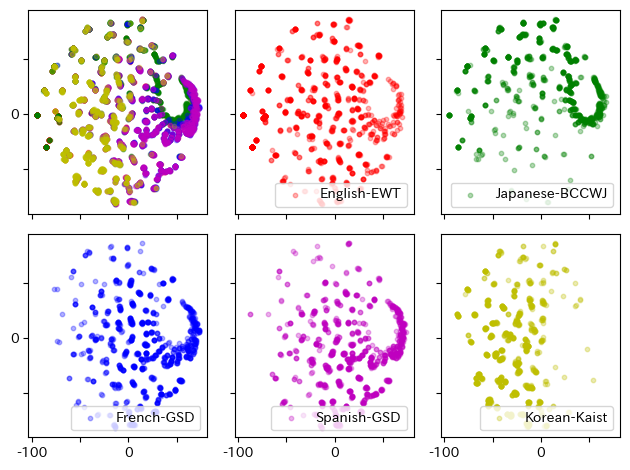

In [ ]:
fig, ax = plt.subplots(2,3, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax[0,0].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish", alpha=0.3, s=10, c="m")
ax[0,0].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")

ax[0,0].set_xticks(axes_ticks)
ax[0,0].set_xticklabels(axes_labels)
ax[0,0].set_yticks(axes_ticks)
ax[0,0].set_yticklabels(axes_labels)


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].legend(loc="lower right")

ax[0,2].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese-BCCWJ", alpha=0.3, s=10, c="g")
ax[0,2].legend(loc="lower right")

ax[1,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French-GSD", alpha=0.3, s=10, c="b")
ax[1,0].legend(loc="lower right")

ax[1,1].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish-GSD", alpha=0.3, s=10, c="m")
ax[1,1].legend(loc="lower right")

ax[1,2].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean-Kaist", alpha=0.3, s=10, c="y")
ax[1,2].legend(loc="lower right")

plt.savefig("TreeKernel_multi_language_1000.png", dpi=600)

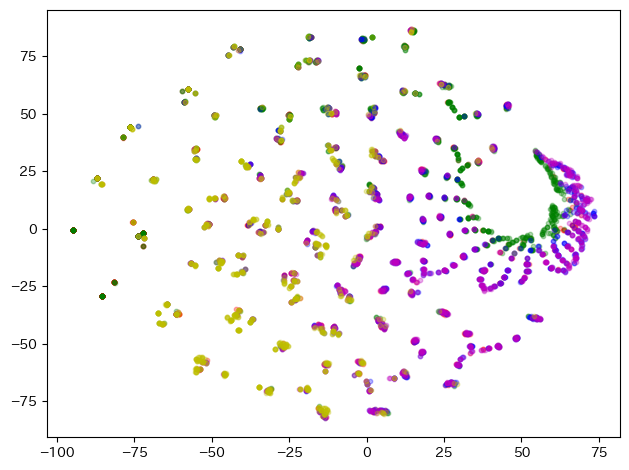

In [ ]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax.scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax.scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax.scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Spanish", alpha=0.3, s=10, c="m")
ax.scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")


In [ ]:
kernel_matrix_multi = np.load("kernel_matrix_multi_languages_1000_zh.npy")

In [ ]:
kernel_matrix_multi

array([[ 7.56445312,  9.        , 22.        , ..., 12.        ,
         7.5       ,  7.        ],
       [ 9.        , 11.12597656, 25.5       , ..., 15.        ,
         9.625     ,  8.        ],
       [22.        , 25.5       , 76.84570697, ..., 32.5       ,
        19.75      , 27.        ],
       ...,
       [12.        , 15.        , 32.5       , ..., 22.15821838,
        14.        , 10.625     ],
       [ 7.5       ,  9.625     , 19.75      , ..., 14.        ,
         9.15722656,  6.25      ],
       [ 7.        ,  8.        , 27.        , ..., 10.625     ,
         6.25      , 10.53173828]])

In [ ]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

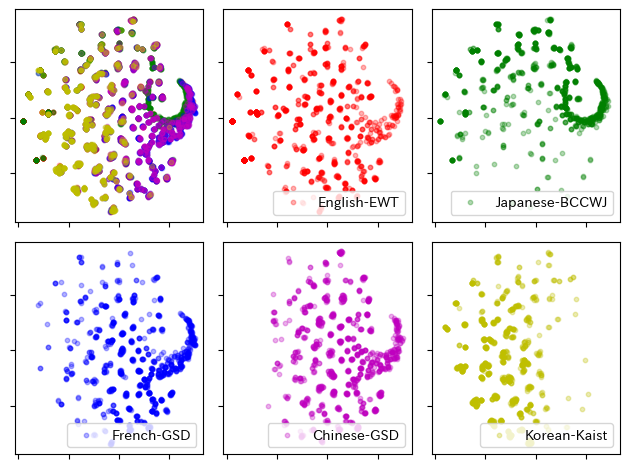

In [ ]:
k = 300

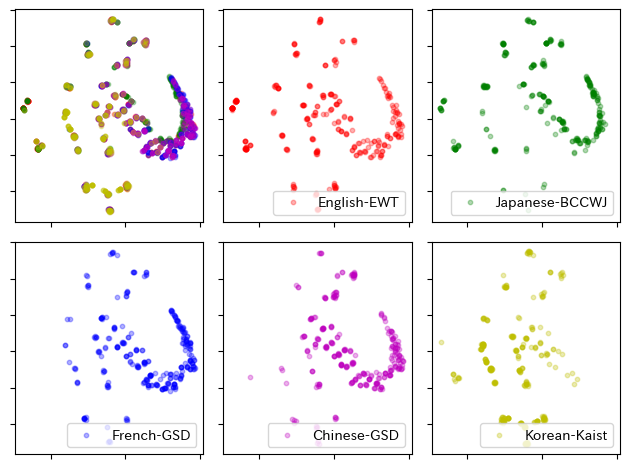

In [ ]:
kernel_matrix_multi = np.load(f"kernel_matrix_multi_languages_{k}_zh.npy")

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

nums_list = [k]*5
nums_sum = [k*(i+1) for i in range(5)]

fig, ax = plt.subplots(2,3, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax[0,0].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese", alpha=0.3, s=10, c="m")
ax[0,0].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")

ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].legend(loc="lower right")

ax[0,2].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese-BCCWJ", alpha=0.3, s=10, c="g")
ax[0,2].legend(loc="lower right")

ax[1,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French-GSD", alpha=0.3, s=10, c="b")
ax[1,0].legend(loc="lower right")

ax[1,1].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese-GSD", alpha=0.3, s=10, c="m")
ax[1,1].legend(loc="lower right")

ax[1,2].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean-Kaist", alpha=0.3, s=10, c="y")
ax[1,2].legend(loc="lower right")

plt.savefig(f"TreeKernel_multi_language_{k}.png", dpi=600)

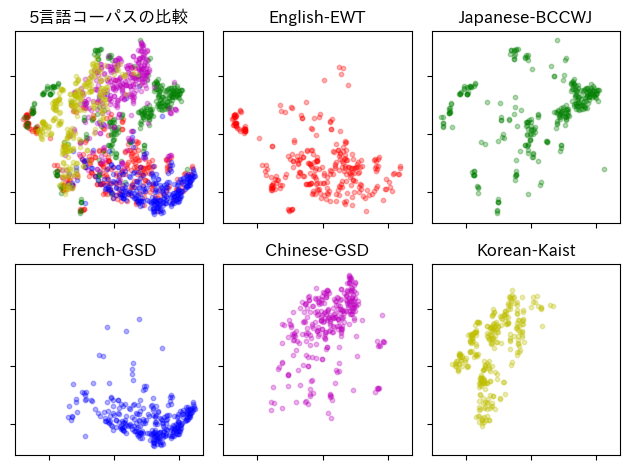

In [ ]:
kernel_matrix_multi = np.load(f"kernel_matrix_multi_languages_{k}_zh_upos.npy")

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

nums_list = [k]*5
nums_sum = [k*(i+1) for i in range(5)]

fig, ax = plt.subplots(2,3, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax[0,0].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese", alpha=0.3, s=10, c="m")
ax[0,0].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")

ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
ax[0,0].set_title("5言語コーパスの比較")


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].set_title("English-EWT")

ax[0,2].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese-BCCWJ", alpha=0.3, s=10, c="g")
ax[0,2].set_title("Japanese-BCCWJ")

ax[1,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French-GSD", alpha=0.3, s=10, c="b")
ax[1,0].set_title("French-GSD")

ax[1,1].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese-GSD", alpha=0.3, s=10, c="m")
ax[1,1].set_title("Chinese-GSD")

ax[1,2].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean-Kaist", alpha=0.3, s=10, c="y")
ax[1,2].set_title("Korean-Kaist")

plt.savefig(f"TreeKernel_multi_language_{k}_upos.png", dpi=600)

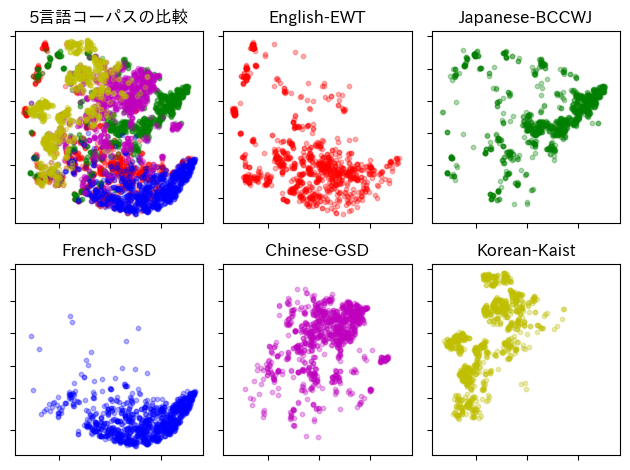

In [ ]:
k=1000
kernel_matrix_multi = np.load(f"kernel_matrix_multi_languages_{k}_zh_upos.npy")

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(kernel_matrix_multi)

nums_list = [k]*5
nums_sum = [k*(i+1) for i in range(5)]

fig, ax = plt.subplots(2,3, tight_layout=True, sharex=True, sharey=True)

ax[0,0].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English", alpha=0.3, s=10, c="r")
ax[0,0].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese", alpha=0.3, s=10, c="g")
ax[0,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French", alpha=0.3, s=10, c="b")
ax[0,0].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese", alpha=0.3, s=10, c="m")
ax[0,0].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean", alpha=0.3, s=10, c="y")

ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
ax[0,0].set_title("5言語コーパスの比較")


ax[0,1].scatter(X_reduced[:nums_sum[0],0], X_reduced[:nums_sum[0],1], label="English-EWT", alpha=0.3, s=10, c="r")
ax[0,1].set_title("English-EWT")

ax[0,2].scatter(X_reduced[nums_sum[0]:nums_sum[1],0], X_reduced[nums_sum[0]:nums_sum[1],1], label="Japanese-BCCWJ", alpha=0.3, s=10, c="g")
ax[0,2].set_title("Japanese-BCCWJ")

ax[1,0].scatter(X_reduced[nums_sum[1]:nums_sum[2],0], X_reduced[nums_sum[1]:nums_sum[2],1],label="French-GSD", alpha=0.3, s=10, c="b")
ax[1,0].set_title("French-GSD")

ax[1,1].scatter(X_reduced[nums_sum[2]:nums_sum[3],0], X_reduced[nums_sum[2]:nums_sum[3],1],label="Chinese-GSD", alpha=0.3, s=10, c="m")
ax[1,1].set_title("Chinese-GSD")

ax[1,2].scatter(X_reduced[nums_sum[3]:nums_sum[4],0], X_reduced[nums_sum[3]:nums_sum[4],1],label="Korean-Kaist", alpha=0.3, s=10, c="y")
ax[1,2].set_title("Korean-Kaist")

plt.savefig(f"TreeKernel_multi_language_{k}_upos.png", dpi=600)

### 文長による依存性

#### ノード数を揃える

In [ ]:
CoNLL_EN = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_EWT = len(CoNLL_EN)

In [ ]:
lengths = [len(sentence) for sentence in CoNLL_EN]
print(sorted(list(set(lengths)))[-1])

160


In [ ]:
lengths_each = []
for i in range(161):
    lengths_each.append([])

In [ ]:
for sentence in CoNLL_EN:
    l = len(sentence)
    lengths_each[l].append(sentence)

In [ ]:
for i, ls in enumerate(lengths_each[:51]):
    if len(ls)<50:
        print(i, len(ls), end="\n")

0 0
45 35
46 45
47 22
48 34
49 30
50 25


In [ ]:
CoNLL_lengths = lengths_each[1:51] # 木のサイズが[1,50] だけを切り取る

In [ ]:
data = []
for i in range(50):
    data.append([])

In [ ]:
for i in range(50):
    for conll in CoNLL_lengths[i]:
        t = conll.to_tree()
        root = tree.TreeNode.fromPrologString(to_prolog_upos(t))
        tree_ = tree.Tree(root)
        data[i].append(tree_)

In [ ]:
kernel.kernel(data[20][0], data[20][2])

6.0

In [ ]:
kernel_values = []

In [ ]:
def get_kernel_values_list(
        data: list, 
        kernel: tree_kernels.Kernel
    ):

    values = []

    for i, tree_i in enumerate(data):
        for tree_j in data[i:]:
            kernel_val = kernel.kernel(tree_i, tree_j)
            values.append(kernel_val)
    
    return values


In [ ]:
for tree in data[1]:
    print(kernel.kernel(tree,tree),end="\n")

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


In [ ]:
get_kernel_values_list(data[0], kernel)

[0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0.5,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,


In [ ]:
len(data[20]), len(data[-1])

(361, 25)

In [ ]:
kernel_values = []
for trees in tqdm(data):
    kernel_values.append(get_kernel_values_list(trees, kernel))

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
len(kernel_values)

50

[ 5 10 15 20 25 30 35 40 45 50]


Text(0, 0.5, 'Kernel Value')

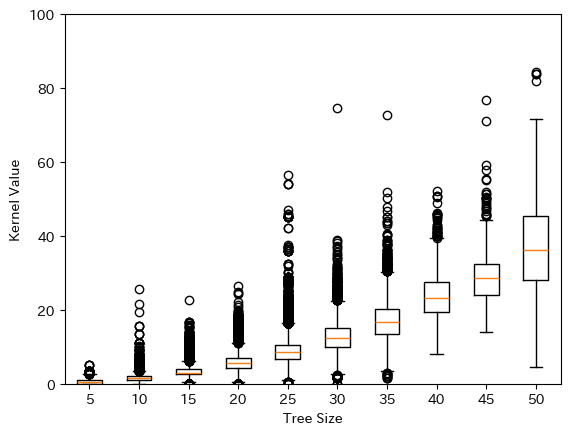

In [ ]:
# 箱びげプロット
x = np.array([i*5 for i in range(1, 11)])
print(x)
Y = [kernel_values[i*5-1] for i in range(1, 11)]
Y = tuple(Y)

fig, ax = plt.subplots()

bp = ax.boxplot(Y)

ax.set_ylim(0,100)
ax.set_xticklabels([i*5 for i in range(1,11)])
ax.set_xlabel("Tree Size")
ax.set_ylabel("Kernel Value")

In [ ]:
kernel_values_mean = [np.mean(d) for d in kernel_values]

In [ ]:
kernel_values_mean

[0.15759204767107496,
 0.23756733838786911,
 0.2113443524525999,
 0.3994912993443995,
 0.5404346684668467,
 0.7282100873878705,
 0.9527439999660295,
 1.191515011651868,
 1.3609867933556532,
 1.6548677816158461,
 1.9109806758010754,
 2.331293236688293,
 2.5101358781327474,
 2.8178672672345653,
 3.322317061627303,
 3.7966242147034093,
 4.285149720611068,
 4.569703229474279,
 5.151598055840867,
 5.656510016537522,
 6.393771429819826,
 6.954550811343997,
 7.634492062005559,
 8.182193932890172,
 8.908205812530184,
 9.613295721396705,
 10.076952658053601,
 11.499780933059524,
 12.069300660942686,
 12.819313113634095,
 13.86727908602959,
 14.650384637153385,
 15.58010697647151,
 17.13945639123444,
 17.23500749521092,
 18.35922116356572,
 20.345454419411315,
 20.60973062344006,
 20.06083322471006,
 23.849956192401056,
 24.261279702066943,
 24.74234042850649,
 26.398421923754487,
 28.235260166300357,
 29.333344938257834,
 28.804794938986223,
 35.358782768200626,
 37.16959595461127,
 35.38430074

Text(0.5, 1.0, '木のサイズとカーネル値（の平均）の関係')

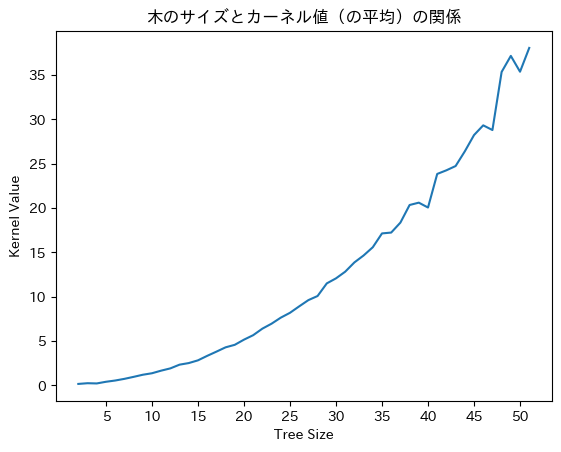

In [ ]:
x = np.linspace(1, 50)

fig, ax = plt.subplots()

ax.plot(x, kernel_values_mean)

ax.set_xticks([i*5-1 for i in range(1,11)])
ax.set_xticklabels([i*5 for i in range(1,11)])
ax.set_xlabel("Tree Size")
ax.set_ylabel("Kernel Value")
ax.set_title("木のサイズとカーネル値（の平均）の関係")

#### 木サイズの差とカーネル値

In [ ]:
del tree

In [ ]:
from scripts.TreeKernel import tree, tree_kernels

CoNLL_EWT = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_EWT = len(CoNLL_EN)

dist_ids = [[]]
values_list = [[]]
for i in range(40):
    dist_ids.append([])
    values_list.append([])

CoNLL_EWT = random.sample(CoNLL_EWT, k=100)

for i, sentence_i in enumerate(CoNLL_EWT):
    for j, sentence_j in enumerate(CoNLL_EWT[i:]):
        size_i = len(sentence_i)
        size_j = len(sentence_j)
        diff = np.abs(size_i-size_j)
        if diff >= len(dist_ids):
            continue
        dist_ids[int(diff)].append((i, j))

trees = [conll.to_tree() for conll in CoNLL_EWT]

data = []

for t in trees:
    root = tree.TreeNode.fromPrologString(to_prolog_upos(t))
    tree_ = tree.Tree(root)
    data.append(tree_)

for diff, id_list in enumerate(dist_ids):
    for i, j in id_list:
        val = kernel.kernel(data[i], data[j])
        values_list[int(diff)].append(val)


In [ ]:
values_mean = [np.mean(values) for values in values_list]
len(values_mean)

41

In [ ]:
del x

Text(0.5, 1.0, '距離の差とカーネル値（の平均）の関係')

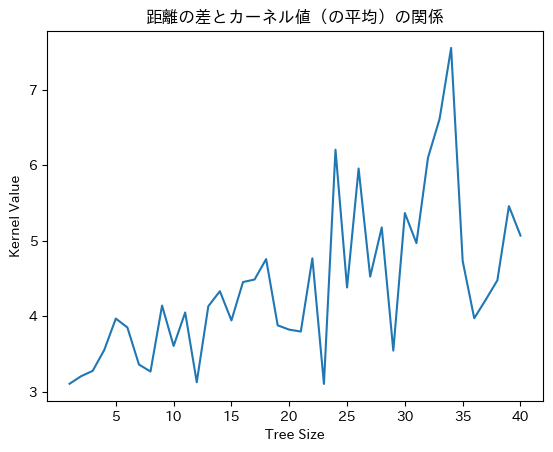

In [ ]:
x = np.array(list(range(40)))

fig, ax = plt.subplots()

ax.plot(x, values_mean[1:])

ax.set_xticks([i*5-1 for i in range(1,9)])
ax.set_xticklabels([i*5 for i in range(1,9)])
ax.set_xlabel("Tree Size")
ax.set_ylabel("Kernel Value")
ax.set_title("距離の差とカーネル値（の平均）の関係")

Text(0.5, 1.0, '距離の差とカーネル値の関係')

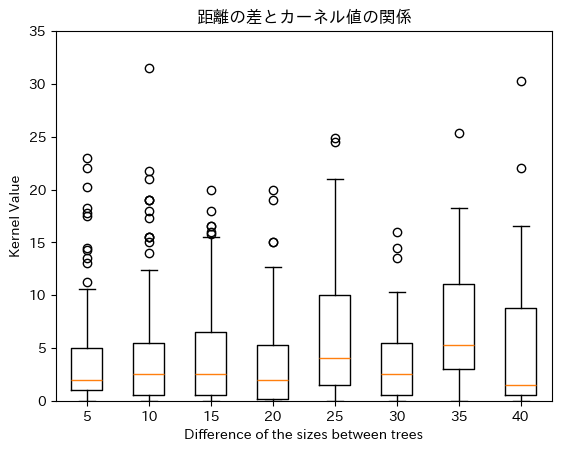

In [ ]:
Y = [values_list[i*5-1] for i in range(1, 9)]
Y = tuple(Y)

fig, ax = plt.subplots()

bp = ax.boxplot(Y)
ax.set_xticklabels([i*5 for i in range(1,9)])
ax.set_ylim(0,35)
ax.set_xlabel("Difference of the sizes between trees")
ax.set_ylabel("Kernel Value")
ax.set_title("距離の差とカーネル値の関係")


### ノード数の同じ一般の木との比較
#### 線形の木の場合

In [45]:
lambda_value = 0.5
mu_value = 0.5
kernelST_l = tree_kernels.KernelPT(lambda_value, mu_value)
kernelST_c = tree_kernels.KernelPT(lambda_value, mu_value)
kernelST_cl = tree_kernels.KernelPT(lambda_value, mu_value)

CoNLL_EWT = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_EWT = len(CoNLL_EWT)

In [ ]:
def inorder_traversal(tree, index, result):
    """
    完全二分木（配列として表現）を中間順巡回してソートする。
    
    Args:
        tree (list): 元の配列
        index (int): 現在のノードのインデックス
        result (list): 中間順巡回で得た要素を格納するリスト
    """
    # インデックスが配列の範囲外なら終了
    if index >= len(tree):
        return

    # 左部分木の探索
    inorder_traversal(tree, 2 * index + 1, result)
    
    # 現在のノードを追加
    result.append(tree[index])
    
    # 右部分木の探索
    inorder_traversal(tree, 2 * index + 2, result)

def sort_by_inorder_traversal(arr):
    """
    配列を完全二分木と見立て、中間順巡回でソートする。
    
    Args:
        arr (list): ソートしたい配列
    Returns:
        list: 中間順巡回によるソート結果
    """
    result = []
    inorder_traversal(arr, 0, result)
    return result

In [50]:
kernel_linear = []
kernel_cmp = []
kernel_cs = []

for sentence in tqdm(CoNLL_EWT):
    length = len(sentence)
    if length >= 50:
        continue

    conll_tree = sentence.to_tree()
    root = tree.TreeNode(to_prolog_unlabel(conll_tree))
    t_ewt = tree.Tree(root)

    labels = []
    for token in sentence:
        labels.append(token.upos)
    t_linear = create_strings.create_linear_tree_TK_unlabel(length, labels=labels)
    labels = create_strings.sort_by_inorder_traversal(labels)
    t_cmp = create_strings.create_complete_tree_TK_unlabel(length, labels=labels)

    kernel_l = kernelST_l.kernel(t_ewt, t_linear)
    kernel_c = kernelST_c.kernel(t_ewt, t_cmp)

    kernel_linear.append(kernel_l)
    kernel_cmp.append(kernel_c)

    kernel_cs.append(kernelST_cl.kernel(t_linear, t_cmp))

print(kernel_linear, kernel_cmp, sep="\n")

  0%|          | 0/16621 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.

In [51]:
for i in range(len(kernel_linear)):
    if kernel_linear[i] != 0 and kernel_cmp[i] != 0:
        print(i, "linear, cmp", kernel_linear[i], kernel_cmp[i], kernel_cs[i])
    elif kernel_linear[i] != 0:
        print(i, "linear")
    elif kernel_cmp[i] != 0:
        print(i, "cmp")

86 linear, cmp 0.125 0.125 0.125
207 linear, cmp 0.125 0.125 0.125
275 linear, cmp 0.125 0.125 0.125
287 linear, cmp 0.125 0.125 0.125
294 linear, cmp 0.125 0.125 0.125
297 linear, cmp 0.125 0.125 0.125
307 linear, cmp 0.125 0.125 0.125
323 linear, cmp 0.125 0.125 0.125
324 linear, cmp 0.125 0.125 0.125
325 linear, cmp 0.125 0.125 0.125
326 linear, cmp 0.125 0.125 0.125
327 linear, cmp 0.125 0.125 0.125
346 linear, cmp 0.125 0.125 0.125
387 linear, cmp 0.125 0.125 0.125
391 linear, cmp 0.125 0.125 0.125
396 linear, cmp 0.125 0.125 0.125
401 linear, cmp 0.125 0.125 0.125
406 linear, cmp 0.125 0.125 0.125
412 linear, cmp 0.125 0.125 0.125
428 linear, cmp 0.125 0.125 0.125
430 linear, cmp 0.125 0.125 0.125
431 linear, cmp 0.125 0.125 0.125
433 linear, cmp 0.125 0.125 0.125
436 linear, cmp 0.125 0.125 0.125
449 linear, cmp 0.125 0.125 0.125
450 linear, cmp 0.125 0.125 0.125
452 linear, cmp 0.125 0.125 0.125
454 linear, cmp 0.125 0.125 0.125
455 linear, cmp 0.125 0.125 0.125
477 linear, cmp

In [52]:
kernel_cs

[9.0,
 115.6875,
 15.625,
 137.765625,
 261.43359375,
 9.0,
 12.078125,
 9.0,
 6.4375,
 15.625,
 174.515625,
 105.375,
 6.4375,
 29.078125,
 34.5,
 34.5,
 12.078125,
 24.125,
 126.484375,
 425.4375,
 34.5,
 15.625,
 19.640625,
 29.078125,
 24.125,
 9.0,
 6.4375,
 149.53125,
 68.96875,
 174.515625,
 34.5,
 34.5,
 4.3125,
 15.625,
 77.34375,
 4.3125,
 15.625,
 12.078125,
 53.671875,
 245.671875,
 446.12109375,
 137.765625,
 277.6875,
 15.625,
 230.40234375,
 115.6875,
 174.515625,
 0.5625,
 488.96484375,
 12.078125,
 53.671875,
 126.484375,
 34.5,
 294.43359375,
 77.34375,
 126.484375,
 53.671875,
 24.125,
 6.4375,
 161.78125,
 126.484375,
 15.625,
 201.4375,
 105.375,
 261.43359375,
 86.203125,
 366.33984375,
 68.96875,
 174.515625,
 24.125,
 261.43359375,
 277.6875,
 201.4375,
 29.078125,
 0.5625,
 311.671875,
 34.5,
 511.125,
 329.40234375,
 187.734375,
 161.78125,
 86.203125,
 230.40234375,
 105.375,
 511.125,
 149.53125,
 0.125,
 405.24609375,
 294.43359375,
 2.625,
 15.625,
 174.51

In [56]:
for val in kernel_linear:
    if val != 0:
        print(val, end=",")

for val in kernel_cmp:
    if val != 0:
        print(val, end=",")

In [61]:
conll_trees = [conll.to_tree() for conll in CoNLL_EWT]
treenodes = [tree.TreeNode(to_prolog_unlabel(conll_tree)) for conll_tree in conll_trees]
trees = [tree.Tree(node) for node in treenodes]


In [40]:
sentence1 = CoNLL_EWT[0]
for token in sentence1:
    print(token.upos)

PRON
SCONJ
PROPN
VERB
ADP
PROPN
PUNCT


In [62]:
for i in range(1, num_EWT):
    kernel_val = kernel.kernel(trees[2], trees[i])
    if kernel_val!=0:
        print(i, kernel_val)

2 0.125
287 0.125
1233 0.125
1766 0.125
2748 0.125
3105 0.125
3734 0.125
4050 0.125
4788 0.125
5349 0.125
5960 0.125
5985 0.125
6140 0.125
6286 0.125
6298 0.125
6359 0.125
6361 0.125
6544 0.125
7422 0.125
7544 0.125
7548 0.125
8741 0.125
11648 0.125
13061 0.125
13134 0.125
13313 0.125
15132 0.125
15151 0.125
15406 0.125


#### 分類問題解けるの？

##### 線形木

In [14]:
lambda_value = 0.5
mu_value = 0.5
kernelST_l = tree_kernels.KernelST(lambda_value, mu_value)

CoNLL_EWT = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_EWT = len(CoNLL_EWT)

CoNLL_EWT = random.choices(CoNLL_EWT, k=1000)

data = []
labels = []

for sentence in tqdm(CoNLL_EWT):
    length = len(sentence)
    if length >= 50:
        continue

    conll_tree = sentence.to_tree()
    root = tree.TreeNode(to_prolog_upos(conll_tree))
    t_ewt = tree.Tree(root)

    data.append(t_ewt)
    labels.append(0)

    node_labels = []
    for token in sentence:
        node_labels.append(token.upos)
    t_linear = create_strings.create_linear_tree_TK_upos(length, labels=node_labels)

    data.append(t_linear)
    labels.append(1)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8, random_state=50, shuffle=True
)

In [19]:
print(train_data[0])

VERB(PRON, ADV, NUM(ADP), VERB(SCONJ, PRON, PRON))


In [20]:
print(data[0])

VERB(PRON, ADV, NUM(ADP), VERB(SCONJ, PRON, PRON))


In [ ]:
def calc_kernel_matrix(kernel: tree_kernels.Kernel, data1, data2=None):
    
    if data2==None:
        n = len(data1)
        matrix = np.zeros((n,n))
        for i in tqdm(range(n)):
            #if i%2000 == 0:
                #print(f"{i}th loop, {time()-start}sec", flush=True)
            for j in range(i,n):
                matrix[i][j] = kernel.kernel(data1[i], data1[j])
        return matrix + matrix.T -np.diag(matrix.diagonal())

    n1, n2 = len(data1), len(data2)
    matrix = np.zeros((n1, n2))
    for i in tqdm(range(n1)):
        #if i%2000 == 0:
            #print(f"{i}th loop, {time()-start}sec", flush=True)
        for j in range(n2):
            matrix[i][j] = kernel.kernel(data1[i], data2[j])
    return matrix

In [23]:
lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

In [32]:
train_kernel_matrix = calc_kernel_matrix(kernel, train_data)
test_kernel_matrix = calc_kernel_matrix(kernel, test_data, train_data)

  0%|          | 0/1560 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

In [33]:
model = SVC(kernel='precomputed')
model.fit(train_kernel_matrix, train_labels)

test_pred = model.predict(test_kernel_matrix)


In [35]:
confusion_matrix(test_labels, test_pred)

array([[189,   7],
       [  2, 192]])

In [36]:
accuracy_score(test_labels, test_pred)

0.9769230769230769

In [38]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       196
           1       0.96      0.99      0.98       194

    accuracy                           0.98       390
   macro avg       0.98      0.98      0.98       390
weighted avg       0.98      0.98      0.98       390



##### 完全木の場合

In [40]:
lambda_value = 0.5
mu_value = 0.5
kernelST_l = tree_kernels.KernelST(lambda_value, mu_value)

CoNLL_EWT = pyconll.load_from_file("corpora/English/English-EWT.conllu")
num_EWT = len(CoNLL_EWT)

CoNLL_EWT = random.choices(CoNLL_EWT, k=1000)

data = []
labels = []

for sentence in tqdm(CoNLL_EWT):
    length = len(sentence)
    if length >= 50:
        continue

    conll_tree = sentence.to_tree()
    root = tree.TreeNode(to_prolog_unlabel(conll_tree))
    t_ewt = tree.Tree(root)

    data.append(t_ewt)
    labels.append(0)

    node_labels = []
    for token in sentence:
        node_labels.append("_")
    t_linear = create_strings.create_linear_tree_TK_upos(length, labels=node_labels)

    data.append(t_linear)
    labels.append(1)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [41]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8, random_state=50, shuffle=True
)

lambda_value = 0.5
kernel = tree_kernels.KernelST(lambda_value)

train_kernel_matrix = calc_kernel_matrix(kernel, train_data)
test_kernel_matrix = calc_kernel_matrix(kernel, test_data, train_data)

model = SVC(kernel='precomputed')
model.fit(train_kernel_matrix, train_labels)

test_pred = model.predict(test_kernel_matrix)

  0%|          | 0/1577 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

In [42]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       210
           1       0.95      1.00      0.98       185

    accuracy                           0.98       395
   macro avg       0.98      0.98      0.98       395
weighted avg       0.98      0.98      0.98       395



In [43]:
print(accuracy_score(test_labels, test_pred))

0.9772151898734177
